In [53]:
path = r'C:\Users\huda\Downloads\results_worker_all.txt'

In [54]:
with open(path, 'r') as f:
    lines = f.readlines()

In [55]:
def to_instance(source, instance):
    result = ''
    if source.startswith('0'):
        result += 'Behnke'
    elif source.startswith('1'):
        result += 'Brandimarte'
    elif source.startswith('2a'):
        result += 'HurinkSdata'
    elif source.startswith('2b'):
        result += 'HurinkEdata'
    elif source.startswith('2c'):
        result += 'HurinkRdata'
    elif source.startswith('2d'):
        result += 'HurinkVdata'
    elif source.startswith('3'):
        result += 'DPpaulli'
    elif source.startswith('4'):
        result += 'ChambersBarnes'
    elif source.startswith('5'):
        result += 'Kacem'
    else:
        result += 'Fattahi'
    return result + str(instance)

In [56]:
results = []
for line in lines:
    data = line.split(';')
    if not data[1].startswith('Error'):
        instance = data[0]
        values = data[0].split('_')
        source_indicator = values[0]
        instance_number = values[-2]
        instance = to_instance(source_indicator, instance_number)
        status = data[1]
        fitness = float(data[2])
        lower_bound = float(data[3])
        runtime = float(data[4])
        # ignore actual schedules for now
        #results[instance] = {'status': status, 'fitness': fitness, 'lower_bound': lower_bound, 'runtime': runtime}
        results.append({'instance': instance, 'status': status, 'fitness': fitness, 'lower_bound': lower_bound, 'runtime': runtime})

In [57]:
import pandas as pd

df = pd.DataFrame.from_dict(results)

In [58]:
df.head(10)

,instance,status,fitness,lower_bound,runtime
0,Behnke10,FEASIBLE,139.0,79.0,3600.310825
1,Behnke11,FEASIBLE,313.0,75.0,3600.518106
2,Behnke12,FEASIBLE,295.0,74.0,3600.760237
3,Behnke13,FEASIBLE,321.0,76.0,3600.659132
4,Behnke14,FEASIBLE,316.0,82.0,3600.533584
5,Behnke15,FEASIBLE,305.0,80.0,3600.516899
6,Behnke16,FEASIBLE,569.0,79.0,3601.062940
7,Behnke17,FEASIBLE,553.0,73.0,3601.744056
8,Behnke18,FEASIBLE,591.0,80.0,3601.145044
9,Behnke19,FEASIBLE,627.0,76.0,3601.051124


In [59]:
gurobi_path = r'C:\Users\huda\Downloads\gurobi_workers_renamed.txt' # NOTE: all failed instances are removed
gurobi_results = []

with open(gurobi_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if not line.startswith('Error'):
            data = line.split(';')
            instance = to_instance(data[0], data[1])
            fitness = float(data[2])
            upper_bound = float(data[3])
            lower_bound = float(data[4])
            gap = float(data[5])
            status = 'FEASIBLE' if int(data[6]) != 2 else 'OPTIMAL'
            fevals = float(data[7])
            runtime = float(data[9]) # only use overall time to compare to cp solution
            #ignore rest for now
            #gurobi_results[instance] = {'status': status, 'fitness': fitness, 'lower_bound': lower_bound, 'runtime': runtime}
            gurobi_results.append({'instance': instance, 'status': status, 'fitness': fitness, 'lower_bound': lower_bound, 'runtime': runtime})


In [60]:
df_gurobi = pd.DataFrame.from_dict(gurobi_results)

In [61]:
df_gurobi.head(10)

,instance,status,fitness,lower_bound,runtime
0,Behnke10,FEASIBLE,187.000000,0.0,5684.424217
1,Behnke1,FEASIBLE,84.000000,0.0,4355.722023
2,Behnke3,FEASIBLE,88.000000,0.0,4227.216257
3,Behnke55,OPTIMAL,19.999999,0.0,422.563966
4,Behnke56,FEASIBLE,723.000000,0.0,3679.509608
5,Behnke57,FEASIBLE,554.000000,0.0,3792.448230
6,Behnke58,FEASIBLE,844.000000,0.0,4895.622279
7,Behnke59,FEASIBLE,371.000000,0.0,3792.527982
8,Behnke5,FEASIBLE,254.000000,0.0,4155.350154
9,Behnke60,FEASIBLE,39.000000,0.0,3618.457644


In [62]:
df = pd.concat([df.assign(dataset='cp'), df_gurobi.assign(dataset='gurobi')])

In [63]:
benchmark_base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\upgrades\code\benchmarks_with_workers'
def load_benchmark_info(instance):
    file = benchmark_base_path
    if instance.startswith('Behnke'):
        file += '/0_BehnkeGeiger/'
    elif instance.startswith('Brandimarte'):
        file += '/1_Brandimarte/'
    elif instance.startswith('HurinkSdata'):
        file += '/2a_Hurink_sdata/'
    elif instance.startswith('HurinkEdata'):
        file += '/2b_Hurink_edata/'
    elif instance.startswith('HurinkRdata'):
        file += '/2c_Hurink_rdata/'
    elif instance.startswith('HurinkVdata'):
        file += '/2d_Hurink_vdata/'
    elif instance.startswith('DPpaulli'):
        file += '/3_DPpaulli/'
    elif instance.startswith('Chambers'):
        file += '/4_ChambersBarnes/'
    elif instance.startswith('Kacem'):
        file += '/5_Kacem/'
    else:
        file += '/6_Fattahi/'
    file += instance + '.fjs'
    with open(file, 'r') as f:
        lines = f.readlines()
    benchmark_system = lines[0].split(' ')
    n_machines = int(benchmark_system[0])
    n_jobs = int(benchmark_system[1])
    n_workers = float(benchmark_system[2])
    jobs = lines[1:]
    n_operations = sum([int(x.split(' ')[0]) for x in jobs])
    average_operations = n_operations / n_jobs
    return n_machines, n_jobs, n_operations, n_workers, average_operations

In [64]:
import seaborn as sns

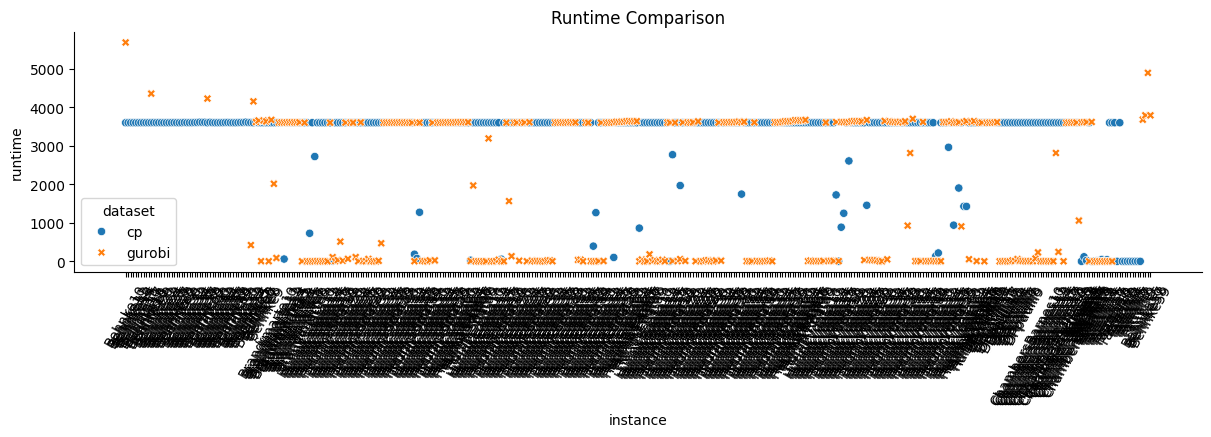

In [65]:
fg = sns.FacetGrid(data=df, aspect=4)
sns.scatterplot(x='instance', y='runtime', data=df, hue='dataset', style='dataset').set(title='Runtime Comparison')
fg.set_xticklabels(rotation=60)

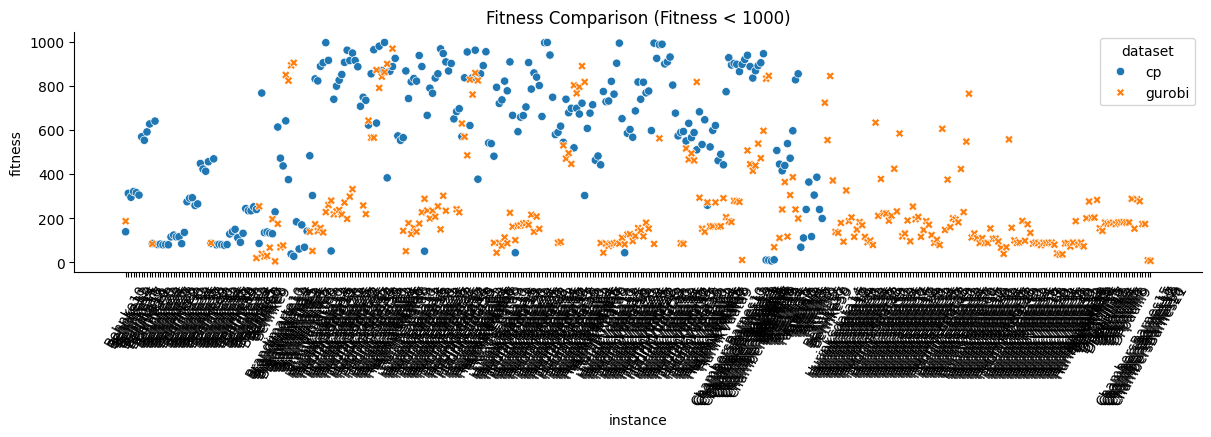

In [66]:
fg = sns.FacetGrid(data=df, aspect=4)
sns.scatterplot(x='instance', y='fitness', data=df.loc[df['fitness'] < 1000], hue='dataset', style='dataset').set(title='Fitness Comparison (Fitness < 1000)')
fg.set_xticklabels(rotation=60)

Text(0.5, 1.0, 'WFJSSP')

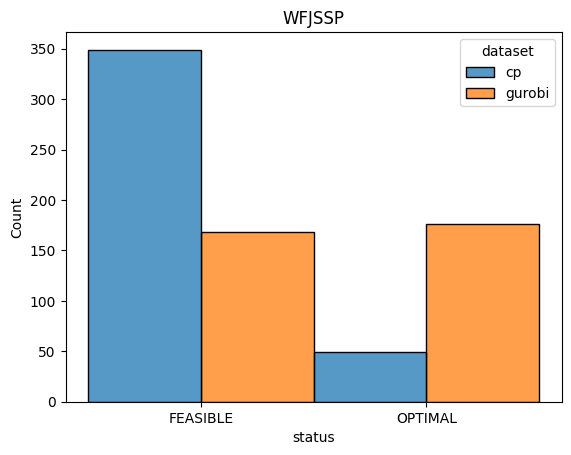

In [67]:
sns.histplot(data=df, x='status', hue='dataset', multiple='dodge').set_title('WFJSSP')

[Text(0.5, 1.0, 'Log Runtime Comparison')]

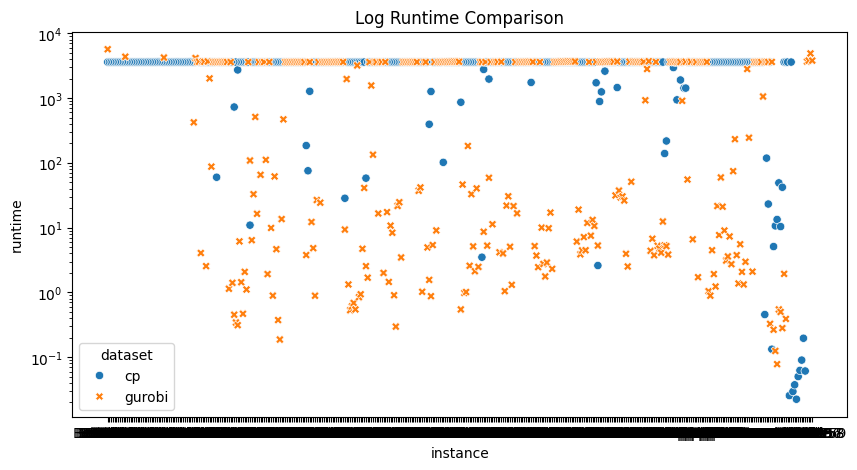

In [68]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 5))
ax.set(yscale="log")
sns.scatterplot(x='instance', y='runtime', ax=ax, data=df, hue='dataset', style='dataset').set(title='Log Runtime Comparison')

[Text(0.5, 1.0, 'Log Fitness Comparison')]

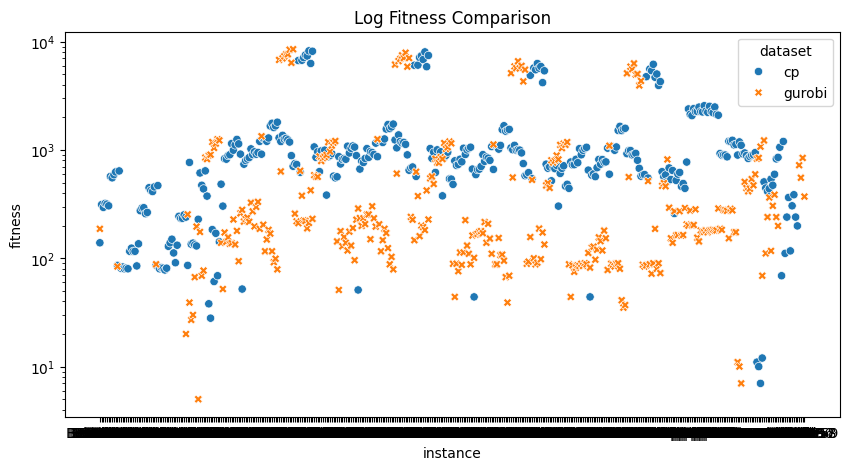

In [69]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 5))
ax.set(yscale="log")
sns.scatterplot(x='instance', y='fitness', ax=ax, data=df, hue='dataset', style='dataset').set(title='Log Fitness Comparison')

[Text(0.5, 1.0, 'Log Fitness and Log Runtime')]

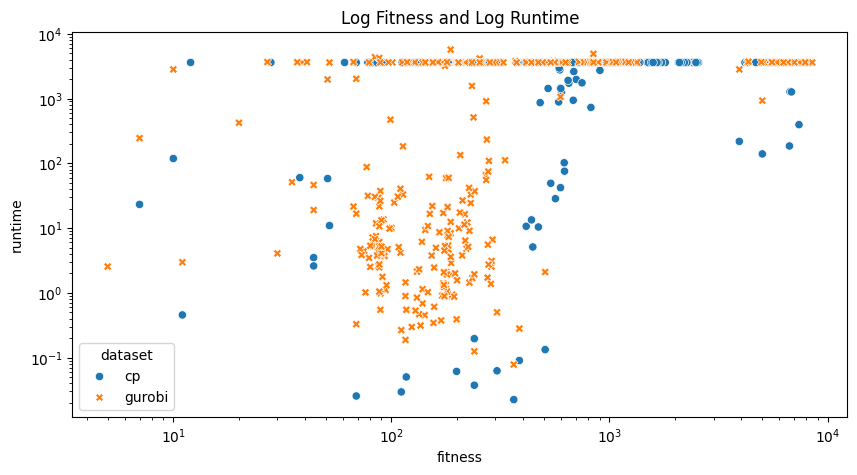

In [70]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 5))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x='fitness', y='runtime', ax=ax, data=df, hue='dataset', style='dataset').set(title='Log Fitness and Log Runtime')